In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Diabetes Prediction Using Machine Learning2/ diabetes.csv")
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [ ]:
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Zero মানকে NaN এ রূপান্তর
for col in cols_with_missing:
    df[col] = df[col].replace(0, np.nan)

# Median দিয়ে পূরণ
for col in cols_with_missing:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

/tmp/ipython-input-707500479.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [ ]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:04:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Training Accuracy: 0.8658854166666666
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       500
           1       0.81      0.80      0.81       268

    accuracy                           0.87       768
   macro avg       0.85      0.85      0.85       768
weighted avg       0.87      0.87      0.87       768



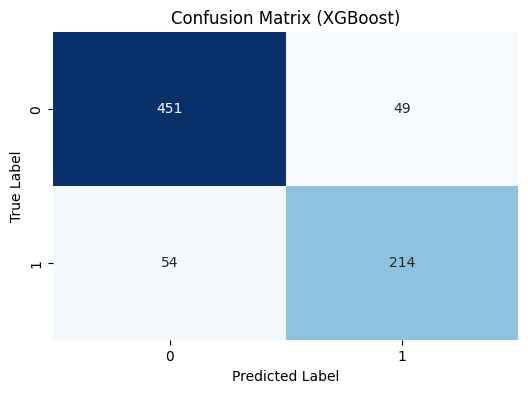

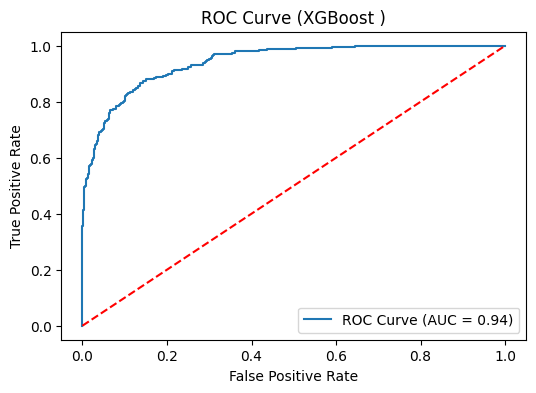

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Feature Selection (Filter Method)
k = 5
feature_selector = SelectKBest(score_func=chi2, k=k)

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

# Create Pipeline: Scaling -> Feature Selection -> Model
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_selection', feature_selector),
    ('classifier', xgb)
])

# Grid Search with LOOCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid={
        'classifier__n_estimators': param_grid['n_estimators'],
        'classifier__max_depth': param_grid['max_depth'],
        'classifier__learning_rate': param_grid['learning_rate'],
        'classifier__subsample': param_grid['subsample']
    },
    cv=loo,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the model
grid_search.fit(X, y)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X)

# Accuracy and Classification Report
train_accuracy = accuracy_score(y, y_pred)
print("Training Accuracy:", train_accuracy)
print("Classification Report:\n", classification_report(y, y_pred))


# Confusion Matrix

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# ROC Curve

y_pred_prob = grid_search.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost )")
plt.legend(loc="lower right")
plt.show()


In [14]:
import pandas as pd

# Load dataset
#df = pd.read_csv("your_dataset.csv")

# Target column (change "Class" to your real column name)
target_col = "Outcome"

# Class counts
print(df[target_col].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


In [15]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# === Step 1: Load your dataset ===
#df = pd.read_csv("your_dataset.csv")

# === Step 2: Features (X) & Target (y) আলাদা করুন ===
X = df.drop("Outcome", axis=1)   # Outcome বাদ দিয়ে বাকি সব features
y = df["Outcome"]                # Target column

print("Before SMOTE:", Counter(y))

# === Step 3: Apply SMOTE ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({0: 500, 1: 268})
After SMOTE: Counter({1: 500, 0: 500})


Before SMOTE: [500 268]
After SMOTE: [500 500]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:43:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__subsample': 1}
Training Accuracy: 0.8411458333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       500
           1       0.73      0.88      0.79       268

    accuracy                           0.84       768
   macro avg       0.83      0.85      0.83       768
weighted avg       0.86      0.84      0.84       768



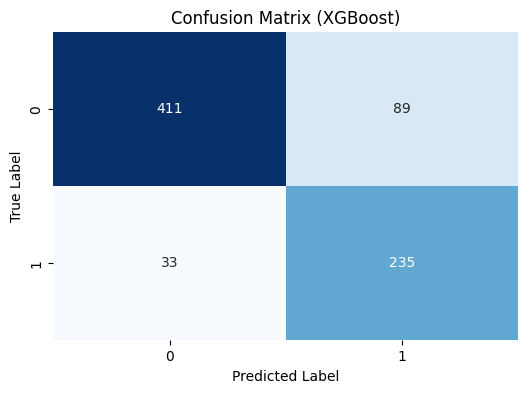

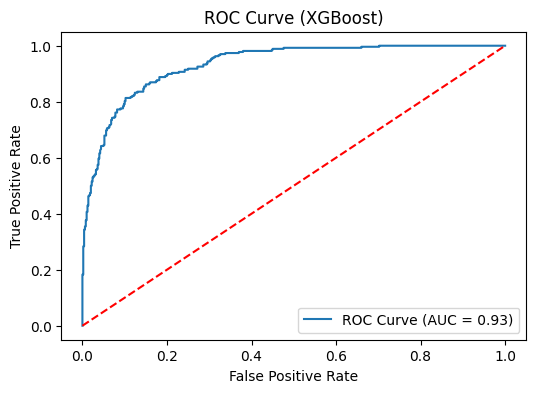

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline  # imblearn Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


X = df.drop("Outcome", axis=1)
y = df["Outcome"]


# Feature Selection

k = 5
feature_selector = SelectKBest(score_func=chi2, k=k)


# LOOCV

loo = LeaveOneOut()


# XGBoost Model

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


# Hyperparameter Grid

param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1]
}


# Custom SMOTE Wrapper

class SMOTEWithPrint(SMOTE):
    def fit_resample(self, X, y):
        print("Before SMOTE:", np.bincount(y))
        X_res, y_res = super().fit_resample(X, y)
        print("After SMOTE:", np.bincount(y_res))
        return X_res, y_res


# Pipeline: Scaling -> SMOTE -> Feature Selection -> XGBoost

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('smote', SMOTEWithPrint(random_state=42)),  # custom SMOTE with print
    ('feature_selection', feature_selector),
    ('classifier', xgb)
])


# Grid Search with LOOCV

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=loo,
    n_jobs=-1,
    scoring='accuracy'
)


# Train the model

grid_search.fit(X, y)

# Best Hyperparameters

print("Best Hyperparameters:", grid_search.best_params_)


# Predictions

y_pred = grid_search.predict(X)


# Accuracy and Classification Report

train_accuracy = accuracy_score(y, y_pred)
print("Training Accuracy:", train_accuracy)
print("Classification Report:\n", classification_report(y, y_pred))


# Confusion Matrix

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# ROC Curve

y_pred_prob = grid_search.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost)")
plt.legend(loc="lower right")
plt.show()
